In [1]:
# ----------------------------------------------------------------------
# **Part 1: File Set Up**
# ----------------------------------------------------------------------

#===========DEPENDENCIES=============
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
import requests

pd.set_option('display.max_columns', None)

In [2]:
#============IMPORT==============
csv_file_path = os.path.join('Resources', 'accidents_2014.csv')
traffic_df = pd.read_csv(csv_file_path)

In [3]:
#============DROP BLANK COLUMNS===========

traffic_df.dropna(
    axis=1,
    how='all',
    inplace=True
)

#============DROP BLANK ROWS WITH BLANK VALUES==========

traffic_df['Junction_Control'].replace(
    np.nan, 'None', inplace=True)

traffic_df.replace(
    '', np.nan, inplace=True)

traffic_df.replace(
    'Unknown', np.nan, inplace=True)

traffic_df.dropna(axis=0, inplace=True)

#===========REPLACING ERRANT/MISPELLED VALUES===============

traffic_df['Light_Conditions'].replace(
    'Darkeness: No street lighting',
    'Darkness: No street lighting', 
    inplace=True
)

traffic_df['Pedestrian_Crossing-Physical_Facilities'].replace(
    'non-junction pedestrian crossing',
    'Non-junction Pedestrian Crossing', 
    inplace=True
)

#===========RENAMING COLUMNS===============

traffic_df.rename(columns=
    {'Accident_Index' : 'Accident Index',
     'Longitude' : 'Longitude', 
     'Latitude' : 'Latitude', 
     'Police_Force' : 'Police Force', 
     'Accident_Severity' : 'Accident Severity', 
     'Number_of_Vehicles' : 'Number of Vehicles', 
     'Number_of_Casualties' : 'Number of Casualties', 
     'Date' : 'Date', 
     'Day_of_Week' : 'Day of Week', 
     'Time' : 'Time', 
     'Local_Authority_(District)' : 'Local Authority District', 
     'Local_Authority_(Highway)' : 'Local Authority Highway', 
     '1st_Road_Class' : '1st Road Class', 
     '1st_Road_Number' : '1st Road Number', 
     'Road_Type' : 'Road Type', 
     'Speed_limit' : 'Speed Limit', 
     'Junction_Control' : 'Junction Control', 
     '2nd_Road_Class' : '2nd Road Class', 
     '2nd_Road_Number' : '2nd Road Number', 
     'Pedestrian_Crossing-Human_Control' : 'Pedestrian Crossing Human Control', 
     'Pedestrian_Crossing-Physical_Facilities' : 'Pedestrian Crossing Physical Facilities', 
     'Light_Conditions' : 'Light Conditions', 
     'Weather_Conditions' : 'Weather Conditions', 
     'Road_Surface_Conditions' : 'Road Surface Conditions', 
     'Special_Conditions_at_Site' : 'Special Conditions at Site', 
     'Carriageway_Hazards' : 'Carriageway Hazards', 
     'Urban_or_Rural_Area' : 'Urban or Rural Area', 
     'Did_Police_Officer_Attend_Scene_of_Accident' : 'Police Attended Scene of Accident', 
     'LSOA_of_Accident_Location' : 'LSOA of Accident Location', 
     'Year' : 'Year', 
    }, inplace=True)

# format Date in Datetime format
traffic_df['Date'] = pd.to_datetime(traffic_df['Date'], format='%d/%m/%y')

# display cleaned file
traffic_df

,Accident Index,Longitude,Latitude,Police Force,Accident Severity,Number of Vehicles,Number of Casualties,Date,Day of Week,Time,Local Authority District,Local Authority Highway,1st Road Class,1st Road Number,Road Type,Speed Limit,Junction Control,2nd Road Class,2nd Road Number,Pedestrian Crossing Human Control,Pedestrian Crossing Physical Facilities,Light Conditions,Weather Conditions,Road Surface Conditions,Special Conditions at Site,Carriageway Hazards,Urban or Rural Area,Police Attended Scene of Accident,LSOA of Accident Location,Year
0,201401BS70001,-0.206443,51.496345,1,3,2,1,2014-01-09,5,13:21,12,E09000020,3,315,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,No,E01002814,2014
1,201401BS70006,-0.171308,51.495892,1,3,2,1,2014-01-09,5,8:50,12,E09000020,3,4,Single carriageway,30,Giveway or uncontrolled,3,4,None within 50 metres,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002821,2014
2,201401BS70009,-0.201326,51.498245,1,3,2,1,2014-01-10,6,18:25,12,E09000020,3,315,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002817,2014
3,201401BS70011,-0.207445,51.507511,1,3,2,1,2014-01-10,6,10:55,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002871,2014
4,201401BS70013,-0.179731,51.497822,1,3,2,1,2014-01-05,1,20:26,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,5,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002892,2014
5,201401BS70014,-0.165585,51.498501,1,2,1,1,2014-01-05,1,22:06,12,E09000020,3,4,Dual carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,Non-junction Pedestrian Crossing,Darkness: Street lights present and lit,Raining with high winds,Wet/Damp,None,None,1,Yes,E01002819,2014
7,201401BS70039,-0.183017,51.494905,1,3,1,1,2014-02-01,7,2:05,12,E09000020,3,4,Single carriageway,30,Automatic traffic signal,4,325,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002835,2014
8,201401BS70043,-0.207908,51.514083,1,3,1,1,2014-02-03,2,15:55,12,E09000020,4,415,Single carriageway,30,Automatic traffic signal,4,450,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002874,2014
9,201401BS70045,-0.184189,51.501668,1,3,2,1,2014-02-03,2,17:36,1,E09000033,3,315,Single carriageway,30,Automatic traffic signal,4,325,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002891,2014
10,201401BS70046,-0.194121,51.494627,1,3,2,1,2014-02-03,2,16:45,12,E09000020,3,4,Single carriageway,30,None,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002850,2014


# Basic Data Visualizations

In [4]:
# ----------------------------------------------------------------------
# **Part 2: Basic Data Visualizations**
# This section contains basic data visualizations for the overall 
# dataset without deep analytical goals. 
# ----------------------------------------------------------------------

# ----------------------------------------------------------------------
# Part 2.1: Geographical heatmap
# ----------------------------------------------------------------------


## Count of Traffic Accidents by Month

NameError: name 'arange' is not defined

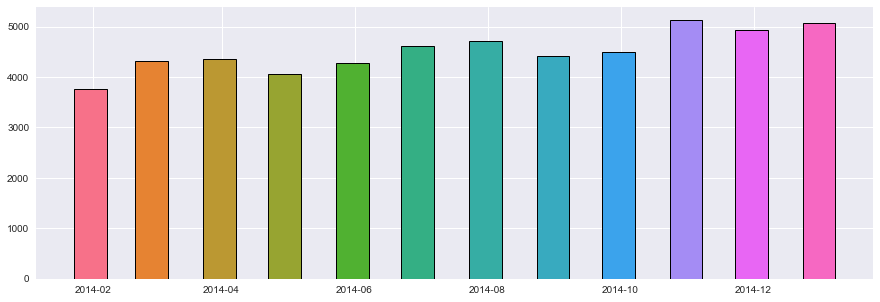

In [55]:
# ----------------------------------------------------------------------
# Part 2.2: Count of Traffic Accidents by Month
# ----------------------------------------------------------------------

# setcreate overall color palette
trafikiColorPalette = sns.color_palette('husl', 12)

# set up list of months
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 
              'December']

# set up data
trafficDataByMonth_df = traffic_df
trafficDataByMonth_df.index = trafficDataByMonth_df['Date']
trafficDataByMonth_df = pd.DataFrame(trafficDataByMonth_df.resample('M').count()['Accident Index'])
trafficDataByMonth_df = trafficDataByMonth_df.reset_index()[['Date', 
                                                             'Accident Index']]
trafficDataByMonth_df.rename(columns={'Accident Index':'Accident Count'}, 
                             inplace=True )

# set up tick locations
x_axis = trafficDataByMonth_df['Date']
y_axis = trafficDataByMonth_df['Accident Count']

# create bar plot
plt.bar(trafficDataByMonth_df['Date'], 
        trafficDataByMonth_df['Accident Count'], 
        color=trafikiColorPalette, width=15, align='center', linewidth=1, 
        edgecolor='black')
#plt.xticks(arange(12), month_list, rotation=35)
#plt.rcParams["figure.figsize"] = [15,5]

In [46]:
# Viz 3: Stacked bar chart (severity) by month